In [3]:
# Load the data and import the sets
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import itertools
import math
# import seaborn as sns

df_imdb = pd.read_csv('tmdb-movies.csv')

Preparation/Data Wrangling

In [9]:
df_imdb.columns = df_imdb.columns.str.capitalize()

In [13]:
df_imdb.Original_title.str.lower()

0                      jurassic world
1                  mad max: fury road
2                           insurgent
3        star wars: the force awakens
4                           furious 7
                     ...             
10861              the endless summer
10862                      grand prix
10863             beregis avtomobilya
10864          what's up, tiger lily?
10865        manos: the hands of fate
Name: Original_title, Length: 10866, dtype: object

In [52]:
df_imdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [53]:
df_imdb.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [48]:
df_imdb.sort_values('popularity', ascending=False)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_list,production_companies_list,cast_list,keywords_list
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...","[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[monster, dna, tyrannosaurus rex, velociraptor..."
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...","[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...","[future, chase, post-apocalyptic, dystopia, au..."
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08,"[Adventure, Drama, Science Fiction]","[Paramount Pictures, Legendary Pictures, Warne...","[Matthew McConaughey, Jessica Chastain, Anne H...","[saving the world, artificial intelligence, fa..."
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08,"[Action, Science Fiction, Adventure]","[Marvel Studios, Moving Picture Company (MPC),...","[Chris Pratt, Zoe Saldana, Dave Bautista, Vin ...","[marvel comic, spaceship, space, scene during ..."
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...","[Shailene Woodley, Theo James, Kate Winslet, A...","[based on novel, revolution, dystopia, sequel,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,1392,tt0388789,0.001117,350000,3515061,Born into Brothels,Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni,http://www.kids-with-cameras.org/bornintobroth...,Zana Briski|Ross Kauffman,NaN,...,12/8/04,23,6.4,2004,4.040559e+05,4.057946e+06,[Documentary],NaN,"[Zana Briski, Avijit, Geeta Masi, Kochi, Mamuni]","[prostitute, red-light disctrict, human traffi..."
6961,15412,tt0466460,0.001115,0,0,Khosla Ka Ghosla!,Anupam Kher|Boman Irani|Parvin Dabas|Tara Shar...,NaN,Dibakar Banerjee,A Delhi-based retired middle class man tries t...,...,9/22/06,10,6.8,2006,0.000000e+00,0.000000e+00,[Comedy],[UTV Motion Pictures],"[Anupam Kher, Boman Irani, Parvin Dabas, Tara ...",[bollywood]
6551,31329,tt0445570,0.000973,0,0,Mon petit doigt m'a dit...,Catherine Frot|AndrÃ© Dussollier|GeneviÃ¨ve Bu...,NaN,Pascal Thomas,NaN,...,4/13/05,13,5.7,2005,0.000000e+00,0.000000e+00,"[Comedy, Mystery]","[RhÃ´ne-Alpes CinÃ©ma, France2 CinÃ©ma]","[Catherine Frot, AndrÃ© Dussollier, GeneviÃ¨ve...",NaN
6080,174323,tt2429074,0.000620,0,0,G.B.F.,Michael J. Willett|Paul Iacono|Sasha Pieterse|...,https://www.facebook.com/GBFmovie,Darren Stein,Being out has never been so in.,...,10/20/13,82,6.1,2013,0.000000e+00,0.000000e+00,[Comedy],"[School Pictures, Parting Shots Media, Logolit...","[Michael J. Willett, Paul Iacono, Sasha Pieter...","[gay, gay kiss, coming out, high school, friends]"


In [2]:
# Splitt the cells with vertical bars into lists
def col_str_to_list(df, col):
    df[f'{col}_list'] = df[col].str.split('|')
    return df

for c in ['genres','production_companies','cast','keywords']:
    df_imdb = col_str_to_list(df_imdb,c)

Q1. Which actor plays in the most different film genres?

In [3]:
# Create a new dataframe where all actors and genres are added. Generate a product of all actors and all genres
df_actor_genre = pd.DataFrame(columns=[])
def actor_genre_list(l1, l2):
    for i in itertools.product(l2,l1):
        l_values = pd.Series(data={"actor":i[0],"genre":i[1]})
        return l_values
    
df_actor_genre = pd.DataFrame(data=[])
for i in range(len(df_imdb)):
    r = df_imdb.iloc[i]
    if r.cast_list == r.cast_list and r.genres_list==r.genres_list:
        l = actor_genre_list(r.cast_list, r.genres_list)
        df_actor_genre = df_actor_genre.append(l, ignore_index=True)

In [4]:
# Then groupby such that you get all unique combinations of genre and actor.
actor_genre_val_count = df_actor_genre.groupby(['genre','actor']).first().reset_index().genre.value_counts()

In [5]:
#See what actors have played aftleast 10 different roles
actor_genre_val_count[actor_genre_val_count>=10]

John Cusack       12
John Travolta     12
Johnny Depp       12
Jim Carrey        11
Matt Damon        10
Ben Affleck       10
George Clooney    10
Nicolas Cage      10
Nicole Kidman     10
Brad Pitt         10
Name: genre, dtype: int64

Q2. Is there a connection between budget and revenue? And does it change over time?

In [6]:
df_imdb.shape

(10866, 25)

In [7]:
df_imdb.budget.value_counts(dropna=False)

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
1645000        1
34200000       1
82500000       1
4250000        1
4653000        1
Name: budget, Length: 557, dtype: int64

In [8]:
df_imdb.revenue.value_counts(dropna=False)

0            6016
12000000       10
10000000        8
11000000        7
5000000         6
             ... 
29300000        1
32189727        1
46546197        1
106269971       1
16017403        1
Name: revenue, Length: 4702, dtype: int64

It seems that half of the entries has no budget or revenue. Therefore, the conclusion will be weak. However, for sake of the question I will still pursue the question by omitting the 0 budget/revenue rows.

In [9]:
# Here we find out how many rows we can use.
df_imdb[(df_imdb.budget>0) & (df_imdb.revenue>0)].shape

(3855, 25)

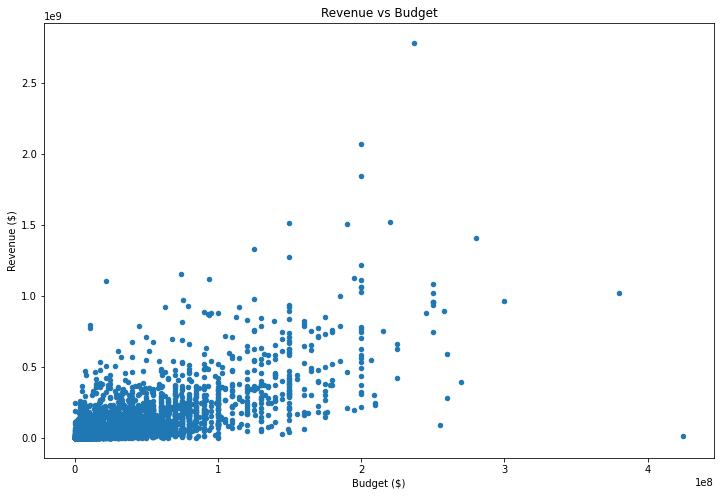

In [10]:
df_budget_rev = df_imdb[(df_imdb.budget>0) & (df_imdb.revenue>0)]
df_budget_rev.plot(kind='scatter',
                   y = 'revenue',
                   x = 'budget',
                   figsize=(12,8),
                   title='Revenue vs Budget',
                   ylabel = 'Revenue ($)',
                   xlabel = 'Budget ($)',
                  );

Not much can be inferred from this. Maybe we can find something from this when we look at years.

In [11]:
df_imdb.release_year.value_counts(dropna=False)

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1972     40
1967     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

Here we can see that significantly more films have been produced closer to 2015. Therefore, I chose to bin years before 1990 in 10 years and years after 2000 in 5 year bins.

<Figure size 432x288 with 0 Axes>

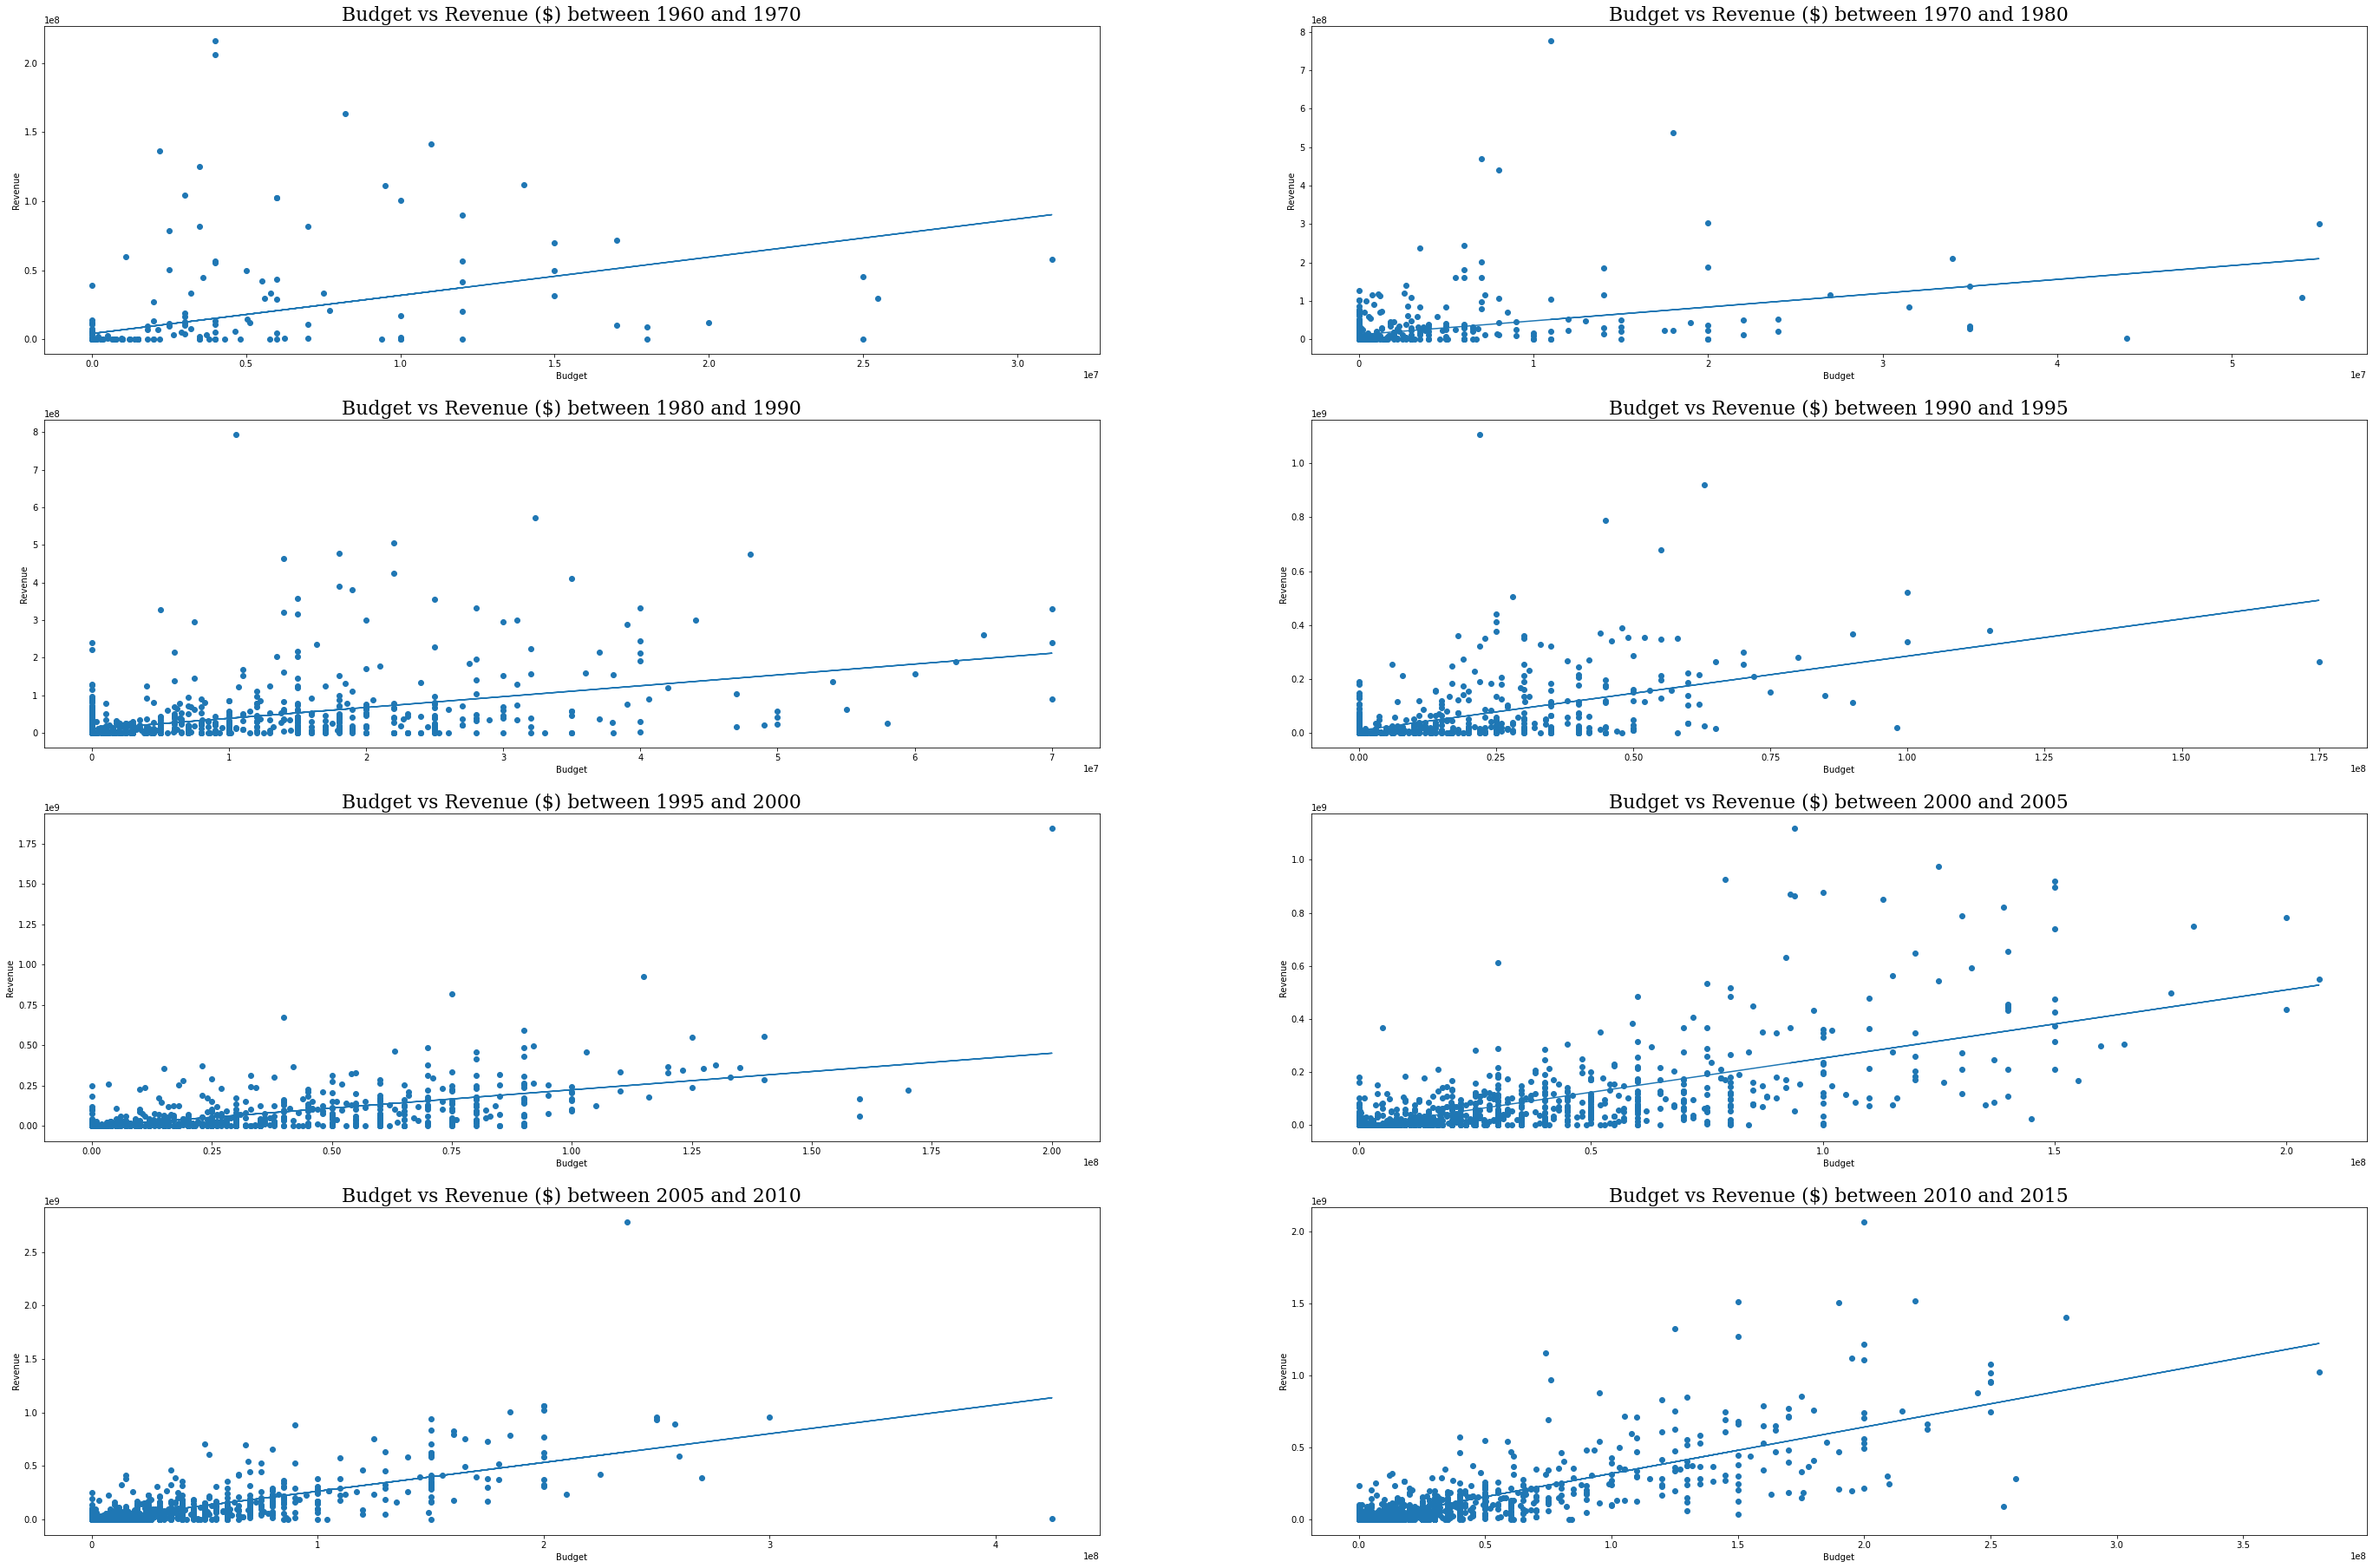

In [58]:
bins = [1960,1970,1980,1990,1995,2000,2005,2010,2015]

# Set the general information
f = plt.figure();
f, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(48,32));
font = {'family': 'serif',
        'weight': 'normal',
        'size': 22,
        }

for i in range(len(bins)):
    # Set start and end year
    year_start = bins[i]
    if year_start==2015:
        break
    year_end = bins[i+1]
    
    # Get the correct data
    df_bin = df_imdb[(df_imdb.release_year > year_start) & (df_imdb.release_year <= year_end)]
    
    # Add regression line to see trends/relations
    m, b = np.polyfit(df_bin.budget, df_bin.revenue,1);
    
    # Scatter plot the data
    axes_subplot = axes[math.floor(i/2)][i%2]
    axes_subplot.set_title(f"Budget vs Revenue ($) between {year_start} and {year_end}", fontdict=font);
    axes_subplot.set_xlabel('Budget')
    axes_subplot.set_ylabel('Revenue')
    axes_subplot.scatter(x=df_bin.budget, y=df_bin.revenue)
    axes_subplot.plot(df_bin.budget, df_bin.budget*m + b);
    # xlabel='Revenue in ($)', ylabel='Budget in ($)' Can't figure out how to add these labels.

Q3. Does runtime affect the rating/popularity?

My approach will be to calculate the average rating score for films with the same runtime. Then plot those on a scatter plot on runtime vs rating.

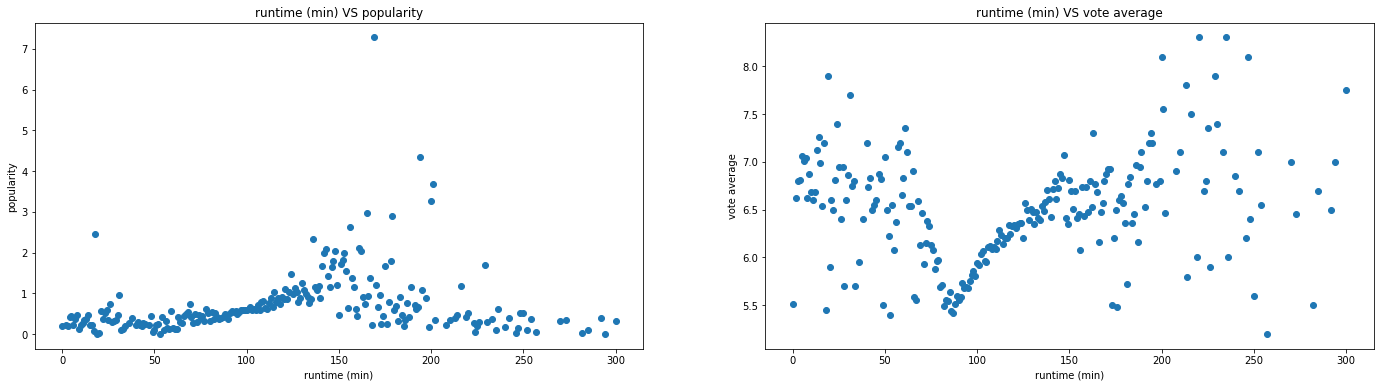

In [56]:
# We restricted the runtime at 5 hours. Such that the outliers don't distort the plots to much.
df_imdb = df_imdb[df_imdb.runtime<=300]


runtime = df_imdb.groupby('runtime')[['popularity','vote_average']].mean().reset_index()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,6));
axes[0].set_xlabel('runtime (min)')
axes[0].set_ylabel('popularity')
axes[1].set_xlabel('runtime (min)')
axes[1].set_ylabel('vote average')
axes[0].set_title('runtime (min) VS popularity')
axes[1].set_title('runtime (min) VS vote average')
axes[0].scatter(runtime.runtime, runtime.popularity, label = 'popularity')
axes[1].scatter(runtime.runtime, runtime.vote_average, label = 'vote_average')

plt.show()

Let's do this again but now we remove the ourlier in the popularity stack to see the picture with some more spread. But first let's see what movie it is.

In [14]:
df_imdb[df_imdb.popularity==df_imdb.popularity.max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_list,production_companies_list,cast_list,keywords_list
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...","[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[monster, dna, tyrannosaurus rex, velociraptor..."


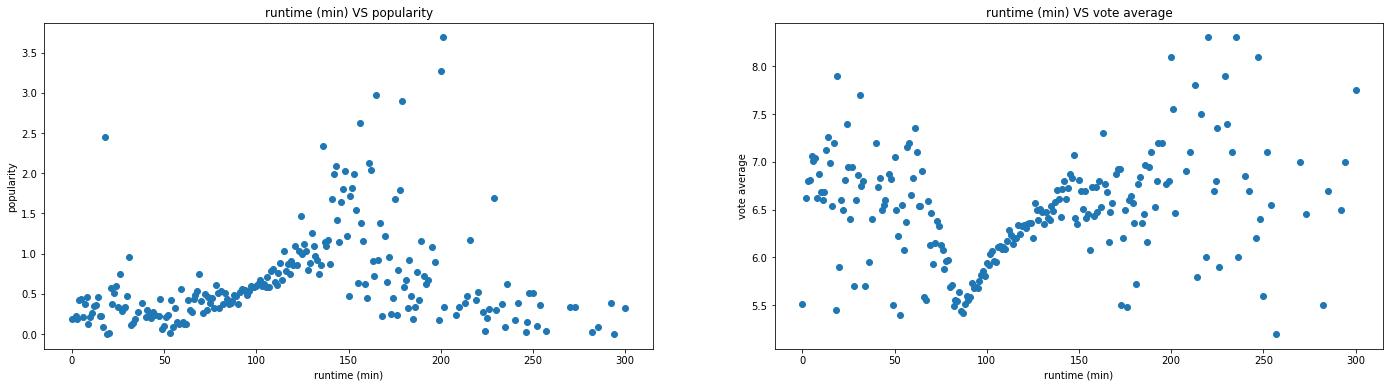

In [55]:
runtime = runtime[runtime.popularity!=runtime.popularity.max()]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,6));
axes[0].set_xlabel('runtime (min)')
axes[0].set_ylabel('popularity')
axes[1].set_xlabel('runtime (min)')
axes[1].set_ylabel('vote average')
axes[0].set_title('runtime (min) VS popularity')
axes[1].set_title('runtime (min) VS vote average')
axes[0].scatter(runtime.runtime, runtime.popularity, label = 'popularity')
axes[1].scatter(runtime.runtime, runtime.vote_average, label = 'vote_average')

Popularity: Here we can easily see that movies with runtime lower than +/- 120 minutes in general more popular if they have more runtime. Where films that are especially long 230min+ are less popular. The scatterplot sort of forms an upward wig.

Vote Average: There seems to be a big spread in in movies with less than 70 minutes runtime and more than 150 minutes runtime. Between 70 and 150 minutes The lowest vote average is around 85minutes and is increasing after in a more or less straight line up.

Q4. What are the most popular keywords? And do they change over time?

In [16]:
# Get dummy columns of all keywords
df_dummies = pd.get_dummies(df_imdb.keywords_list.apply(pd.Series).stack()).sum(level=0)

# Join the dummies to the release year and groupby to count occurences.
df_year_keywords = df_imdb[['release_year']].join(df_dummies)

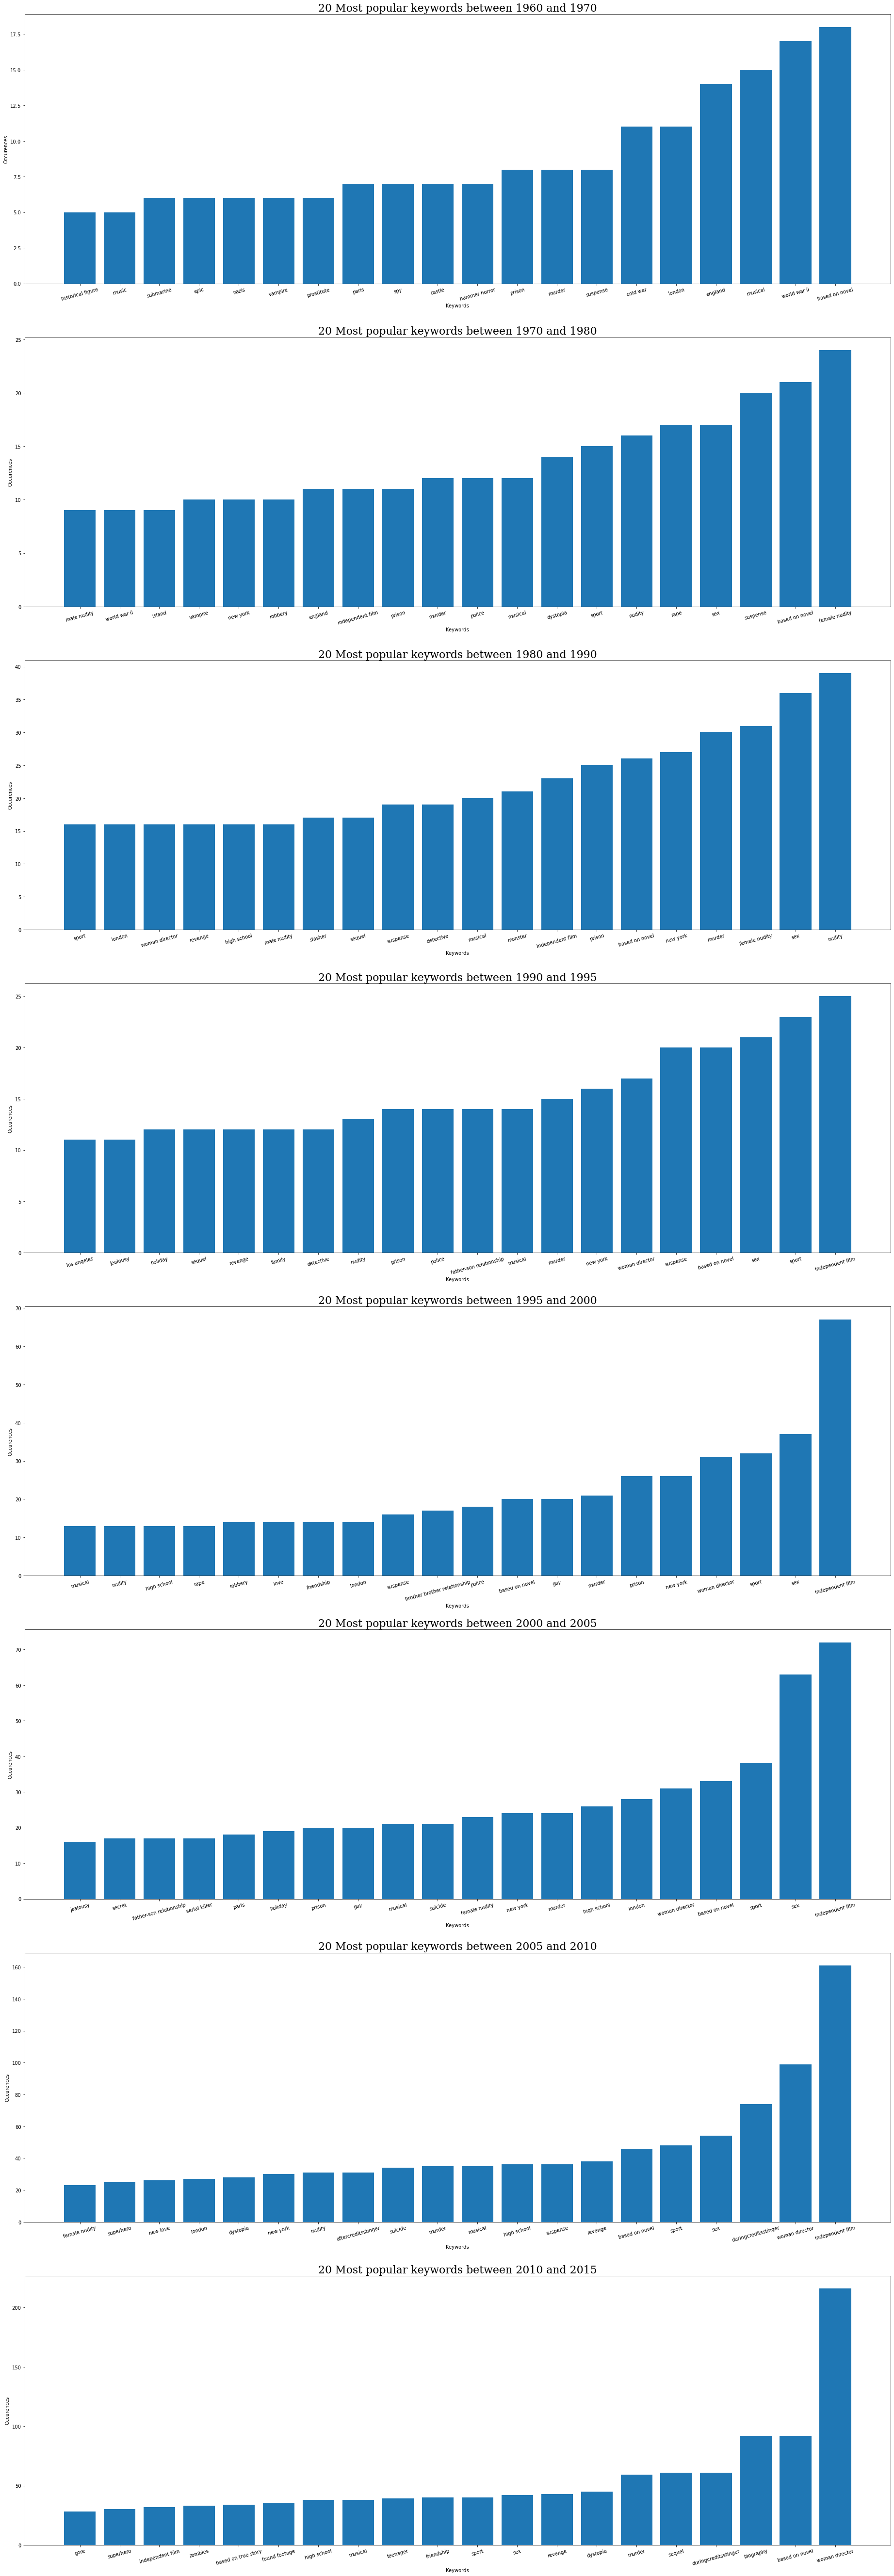

In [64]:
# f = plt.figure();
f, axes = plt.subplots(nrows = 8, ncols = 1, figsize=(32,96));

font = {'family': 'serif',
        'weight': 'normal',
        'size': 22,
        }

for i in range(len(bins)):
    # Set start and end year
    year_start = bins[i]
    if year_start==2015:
        break
    year_end = bins[i+1]
    
    # Get the correct data
    df_bin = df_year_keywords[(df_year_keywords.release_year > year_start) & (df_year_keywords.release_year <= year_end)]
    bin_occurences = df_bin.drop(columns=['release_year']).sum()
    features = bin_occurences[bin_occurences > 0].sort_values(ascending=False)[:20].sort_values(ascending=True)
    df_plot = pd.DataFrame(features.reset_index().rename(columns={0:"Occurences", "index":"Keywords"}))
    
    # Hist plot the data
    axes_subplot = axes[i]
    axes_subplot.tick_params(axis='x', labelrotation=15)
    axes_subplot.set_xlabel('Keywords')
    axes_subplot.set_ylabel('Occurences')

    axes_subplot.set_title(f"20 Most popular keywords between {year_start} and {year_end}", fontdict=font);
    axes_subplot.bar(df_plot['Keywords'], df_plot.Occurences)
    

A lot can be inferred from this. Some conclusions are:
    - Between 1990 and 2010 Independent films were popular. And that number drastically dropped after 2010
    - There is an increasing surge in woman director films. Either in the profession or it being mentioned in the keywords.
    - Between 1970 and 2010 sex or nudity has always been in the top 3 keywords.
    - In earlier periods there were far less movies. In the categorie of 1960 and 1970 if 2 more movies mentioned music in the keywords it would shoot from number 20 to number 10 in popular keywords